# <center>CS568:Deep Learning</center>  <center>Spring 2020</center> 

## Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Load toy dataset

In [0]:
data_x = np.linspace(1, 10, 200)[:, np.newaxis] # generate 100 numbers between 1 and 10.
print(data_x.shape)
data_y = np.sin(data_x) +  0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(200, 1)
print(data_y.shape)
data_x /= np.max(data_x) # normalize data_x values between 0 and 1
data_y /= np.max(data_y)
#print(data_x)
## add bias input 
data_x = np.hstack((np.full_like(data_x, 0.1), data_x))
print(data_x.shape)

(200, 1)
(200, 1)
(200, 2)


## Split data into train and test sets

In [0]:
order = np.random.permutation(len(data_x)) # randomly permute data_x values

# split data into train and test sets
split = 40

train_x = data_x[order[split:]]
train_y = data_y[order[split:]]

print("train_X, train_Y:",train_x.shape, train_y.shape)

test_x = data_x[order[:split]]
test_y = data_y[order[:split]]

print("test_X, test_Y:",test_x.shape, test_y.shape)

train_X, train_Y: (160, 2) (160, 1)
test_X, test_Y: (40, 2) (40, 1)


## Fit model 

In [0]:
def calculate_loss(weights):
    pred = np.dot(weights, train_x.T)
    loss = (1/2)*np.sum((pred - train_y.T) ** 2)
    delta = pred - train_y.T
    return loss, delta

def get_gradient(delta):
    temp = np.dot(delta, train_x)
    return temp

def plot_results(X, y, c, label):
    plt.plot(data_x[:,1], data_x.dot(weights.T), c='g', label='predicted model')
    plt.scatter(X[:,1], y, c=c, label=label)
    plt.grid()
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

W = np.random.randn()
b =np.random.randn()
weights = np.array([W, b]).reshape((1, 2))
lr = 0.01
tolerance = 1e-5
                   
# Perform Gradient Descent
Epochs = 1
while True:
    loss, delta = calculate_loss(weights)
    gradient = get_gradient(delta)
    new_w = weights - lr * gradient                  
    
    # Stopping Condition
    if np.sum(abs(new_w - weights)) < tolerance:
        print("Converged.")
        break
    
    # Print loss every 100 iterations
    if Epochs % 100 == 0:
        print("Epoch: %d - Loss: %.4f" %(Epochs, loss))
    
    Epochs += 1
    weights = new_w
    

print("weights =",weights)                
plot_results(train_x, train_y, 'b', 'training points')

## Plot results

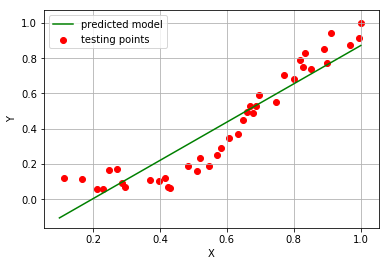

In [0]:
plot_results(test_x, test_y, 'r','testing points')